In [2]:
import matplotlib

In [1]:
import sys
#Rename according to your virtual - env name
sys.path.append('/usr/local/anaconda3/envs/mob-reg/lib/python3.7/site-packages')

In [3]:
import tensorflow as tf

# Extracting VGG keypoints trial

[[[ 91 112 114]
  [ 90 111 113]
  [ 86 111 113]
  ...
  [ 62 120 132]
  [ 34  97 105]
  [ 37 102 110]]

 [[ 94 115 116]
  [ 92 113 114]
  [ 86 112 112]
  ...
  [ 57 115 127]
  [ 46 108 118]
  [ 48 113 121]]

 [[ 94 116 114]
  [ 92 114 112]
  [ 85 112 109]
  ...
  [ 52 110 122]
  [ 51 112 122]
  [ 53 116 124]]

 ...

 [[ 52  59  52]
  [ 47  50  48]
  [ 54  56  57]
  ...
  [149 143 148]
  [150 143 148]
  [150 143 148]]

 [[ 43  48  46]
  [ 47  51  52]
  [ 62  62  68]
  ...
  [149 142 149]
  [151 144 149]
  [151 144 149]]

 [[ 43  48  46]
  [ 47  51  52]
  [ 62  62  68]
  ...
  [149 142 149]
  [151 144 149]
  [151 144 149]]]
/Users/karthik/cnn-registration/src/vgg16partial.npy
finish: itr 46, Q -686, tau 1


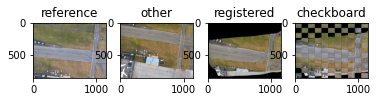

In [22]:
from __future__ import print_function
import Registration
import matplotlib.pyplot as plt
from utils.utils import *
import cv2

# designate image path here
IX_path = '/Users/karthik/Downloads/a.jpg'
IY_path = '/Users/karthik/Downloads/b.jpg'

IX = cv2.imread(IX_path)
IY = cv2.imread(IY_path)
print(IX)
#initialize
reg = Registration.CNN()
#register
X, Y, Z = reg.register(IX, IY)
#generate regsitered image using TPS
registered = tps_warp(Y, Z, IY, IX.shape)
cb = checkboard(IX, registered, 11)

plt.subplot(141)
plt.title('reference')
plt.imshow(cv2.cvtColor(IX, cv2.COLOR_BGR2RGB))

plt.subplot(142)
plt.title('other')
plt.imshow(cv2.cvtColor(IY, cv2.COLOR_BGR2RGB))

plt.subplot(143)
plt.title('registered')
plt.imshow(cv2.cvtColor(registered, cv2.COLOR_BGR2RGB))
plt.subplot(144)
plt.title('checkboard')
plt.imshow(cv2.cvtColor(cb, cv2.COLOR_BGR2RGB))

plt.show()

In [5]:
from __future__ import print_function
import Registration2
import matplotlib.pyplot as plt
from utils.utils import *
import cv2

# designate image path here
IX_path = '/Users/karthik/Downloads/a.jpg'
IY_path = '/Users/karthik/Downloads/b.jpg'

IX = cv2.imread(IX_path)
IY = cv2.imread(IY_path)
print(IX)
#initialize
reg = Registration2.CNN()
#register
hello= reg.register(IX, IY)


[[[ 91 112 114]
  [ 90 111 113]
  [ 86 111 113]
  ...
  [ 62 120 132]
  [ 34  97 105]
  [ 37 102 110]]

 [[ 94 115 116]
  [ 92 113 114]
  [ 86 112 112]
  ...
  [ 57 115 127]
  [ 46 108 118]
  [ 48 113 121]]

 [[ 94 116 114]
  [ 92 114 112]
  [ 85 112 109]
  ...
  [ 52 110 122]
  [ 51 112 122]
  [ 53 116 124]]

 ...

 [[ 52  59  52]
  [ 47  50  48]
  [ 54  56  57]
  ...
  [149 143 148]
  [150 143 148]
  [150 143 148]]

 [[ 43  48  46]
  [ 47  51  52]
  [ 62  62  68]
  ...
  [149 142 149]
  [151 144 149]
  [151 144 149]]

 [[ 43  48  46]
  [ 47  51  52]
  [ 62  62  68]
  ...
  [149 142 149]
  [151 144 149]
  [151 144 149]]]


AttributeError: module 'tensorflow' has no attribute 'placeholder'

In [6]:
import Registration2

In [11]:
A.shape

NameError: name 'A' is not defined

In [36]:
F.shape

(49, 512)

In [44]:
reg.register(IX, IY)[2].shape

(196, 512)

In [46]:
IX.shape

(866, 1154, 3)

In [48]:
np.expand_dims(IX, axis=0).shape

(1, 866, 1154, 3)

In [50]:
np.concatenate((np.expand_dims(IY, axis=0),np.expand_dims(IY, axis=0)),axis=0).shape

(2, 866, 1154, 3)

In [52]:
reg.register(IX, IY)

(array([[0.6996841 , 0.65489256, 0.        , ..., 0.38453475, 0.30313393,
         0.        ],
        [0.6567377 , 0.3178919 , 0.        , ..., 0.4805002 , 0.22971459,
         0.        ],
        [0.84806067, 0.597747  , 0.        , ..., 0.28961715, 0.        ,
         0.        ],
        ...,
        [2.0355132 , 2.5244224 , 0.        , ..., 0.        , 1.0178082 ,
         0.5039566 ],
        [2.5813522 , 2.5496829 , 2.1363816 , ..., 1.0808681 , 0.22746117,
         0.        ],
        [0.33259   , 1.7054596 , 0.16063508, ..., 0.49321893, 0.9581757 ,
         0.        ]], dtype=float32),
 array([[0.24958411, 0.        , 0.        , ..., 0.36322394, 0.92729026,
         0.        ],
        [1.5558807 , 0.7949778 , 0.        , ..., 0.43373236, 0.14359002,
         0.6275293 ],
        [4.2373896 , 0.        , 0.        , ..., 0.54464716, 0.        ,
         1.3352448 ],
        ...,
        [0.448649  , 1.6289154 , 0.9578264 , ..., 1.1965232 , 0.        ,
         0.        

In [59]:
F.shape

(49, 512)

In [68]:
F[48]

array([0.0000000e+00, 0.0000000e+00, 7.4632531e-01, 1.3439755e+00,
       0.0000000e+00, 6.5696902e+00, 1.3164846e+00, 4.8769745e-01,
       0.0000000e+00, 1.5613015e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 1.9209717e-01, 2.7425265e+00, 4.2101266e-03,
       2.6996755e-03, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       1.9261841e+00, 1.1604462e-01, 1.1635835e+00, 1.2956961e+00,
       0.0000000e+00, 2.5357494e+00, 5.0385410e-01, 6.9562852e-02,
       0.0000000e+00, 1.9585841e+00, 0.0000000e+00, 7.3024303e-01,
       8.6708367e-01, 7.6759577e-01, 0.0000000e+00, 8.9933139e-01,
       1.5772793e-01, 0.0000000e+00, 5.0262100e-01, 1.5654072e-01,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 2.3803018e-01,
       1.1652144e+00, 0.0000000e+00, 9.1131097e-01, 5.8346152e-01,
       0.0000000e+00, 3.0545042e+00, 2.1470857e+00, 0.0000000e+00,
       0.0000000e+00, 4.0876870e+00, 0.0000000e+00, 1.0362822e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e

In [8]:
import cv2 as cv

In [9]:
akaze = cv.AKAZE_create()
# Find the keypoints and descriptors with SIFT
kp1, des1 = akaze.detectAndCompute(IX, None)
kp2, des2 = akaze.detectAndCompute(IY, None)

In [136]:
IX.shape

(866, 1154, 3)

In [14]:
type(kp1)

list

In [78]:
des1.shape

(428, 61)

In [77]:
hello[0].shape

(784, 256)

In [86]:
hello[5].shape

(49, 512)

In [106]:
bf = cv.BFMatcher()
matches = bf.knnMatch(hello[4], hello[5], k=2)

In [107]:
good_matches = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good_matches.append([m])

In [108]:
img3 = cv.drawMatchesKnn(IX,kp1,IY,kp2,good_matches,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
cv.imwrite('matches.jpg', img3)

True

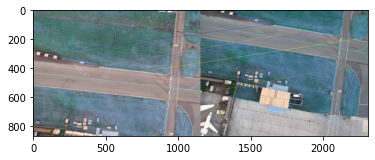

In [109]:
plt.imshow(img3)

# Mobilenet Implementation with keras

In [4]:
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
from keras.optimizers import Adam

In [5]:
tf.__version__

'2.4.1'

## Preprocessing

In [6]:
import keras

In [7]:
from PIL import Image, ImageDraw

In [8]:
mobile = keras.applications.mobilenet.MobileNet()
def prepare_image(file):
    img_path = '/Users/karthik/Downloads/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [10]:
preprocessed_image = prepare_image('b.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n04532670', 'viaduct', 0.17268583),
  ('n04238763', 'slide_rule', 0.09660436),
  ('n06874185', 'traffic_light', 0.056954674),
  ('n03160309', 'dam', 0.04617933),
  ('n03095699', 'container_ship', 0.04171583)]]

In [11]:
img_path = '/Users/karthik/Downloads/'
img = image.load_img(img_path + 'a.jpg', target_size=(224, 224))
img_array = image.img_to_array(img)
img_array_expanded_dims = np.expand_dims(img_array, axis=0)

In [12]:
img_array.shape

(224, 224, 3)

In [13]:
img_array_expanded_dims.shape

(1, 224, 224, 3)

In [14]:
img_array.shape

(224, 224, 3)

In [15]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [16]:
get_3rd_layer_output = K.function([mobile.layers[0].input],
                                  [mobile.layers[3].output])

In [17]:
layer_output2 = (get_3rd_layer_output(preprocessed_image2))

In [18]:
((layer_output2[0])).shape

(1, 112, 112, 32)

In [19]:
(np.reshape(layer_output2[0], [-1, 32]).tolist()[0])

[0.0,
 0.3754812180995941,
 2.2254462242126465,
 0.0,
 0.0,
 0.5224031805992126,
 3.6688849925994873,
 3.1036360263824463,
 0.0,
 2.8587005138397217,
 2.8907642364501953,
 0.10719168931245804,
 3.3427915573120117,
 2.8018367290496826,
 2.2675697803497314,
 0.00868501327931881,
 0.0,
 2.3197267055511475,
 2.639799118041992,
 3.9125678539276123,
 0.0,
 0.0,
 1.7513314485549927,
 2.1197457313537598,
 0.4967125356197357,
 3.6207942962646484,
 2.6948938369750977,
 2.6845970153808594,
 3.4519550800323486,
 2.526495933532715,
 2.053563117980957,
 0.7116904854774475]

In [20]:
len(np.reshape(layer_output2[0], [-1, 32]).tolist())

12544

In [22]:
def ret_descriptors(file):
    img_path = '/Users/karthik/Downloads/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    preprocessed_image = keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)
    predictions = mobile.predict(preprocessed_image)
    results = imagenet_utils.decode_predictions(predictions)
    get_3rd_layer_output = K.function([mobile.layers[0].input],[mobile.layers[3].output])
    layer_output = (get_3rd_layer_output(preprocessed_image2))[0]
    return np.reshape(layer_output2[0], [-1, 32])/np.std(np.reshape(layer_output2[0], [-1, 32]))

In [23]:
ret_descriptors("a.jpg").shape

(12544, 32)

In [24]:
seq = np.array([[i, j] for i in range(28) for j in range(28)], dtype='int32')

In [26]:
(X)

array([[0.01785714, 0.01785714],
       [0.01785714, 0.05357143],
       [0.01785714, 0.08928572],
       ...,
       [0.98214287, 0.91071427],
       [0.98214287, 0.9464286 ],
       [0.98214287, 0.98214287]], dtype=float32)

In [28]:
ret_descriptors("a.jpg")

array([[0.        , 0.26859918, 1.5919652 , ..., 1.80732   , 1.4690092 ,
        0.5091053 ],
       [0.        , 0.27115697, 1.6580535 , ..., 1.8118187 , 1.3124973 ,
        0.50203544],
       [0.        , 0.27480975, 1.6389076 , ..., 1.8155515 , 1.2462918 ,
        0.4679815 ],
       ...,
       [0.        , 0.32372665, 1.1617131 , ..., 1.7990096 , 1.2759233 ,
        0.7595494 ],
       [0.        , 0.31158257, 1.1618377 , ..., 1.7945237 , 1.2630684 ,
        0.761939  ],
       [0.        , 0.29797336, 1.1412147 , ..., 1.7929255 , 1.4617838 ,
        0.815618  ]], dtype=float32)

In [29]:
from __future__ import print_function
import time
import gc
from utils.utils import *
import cv2
from utils.shape_context import ShapeContext
import matplotlib.pyplot as plt

In [30]:
from lap import lapjv

In [36]:
DX1=ret_descriptors("a.jpg")[:500]
DY1=ret_descriptors("b.jpg")[:500]

In [37]:
DY1.shape

(500, 32)

In [38]:
DY1

array([[0.        , 0.26859918, 1.5919652 , ..., 1.80732   , 1.4690092 ,
        0.5091053 ],
       [0.        , 0.27115697, 1.6580535 , ..., 1.8118187 , 1.3124973 ,
        0.50203544],
       [0.        , 0.27480975, 1.6389076 , ..., 1.8155515 , 1.2462918 ,
        0.4679815 ],
       ...,
       [0.        , 0.3369409 , 1.5103794 , ..., 1.9173385 , 1.409106  ,
        0.5952045 ],
       [0.        , 0.32682535, 1.6195695 , ..., 1.9002901 , 1.401929  ,
        0.63748527],
       [0.        , 0.25682285, 1.5724562 , ..., 1.862261  , 1.468764  ,
        0.61095214]], dtype=float32)

In [40]:
PD=pairwise_distance(DX1,DY1)

In [78]:
def register(DX1,DY1):
    height = 224
    width = 224
    shape = np.array([224.0, 224.0])
    sift_weight = 2.0
    cnn_weight = 1.0
    max_itr = 200
    tolerance = 1e-2
    freq = 5 # k in the paper
    epsilon = 0.5
    omega = 0.5
    lambd = 0.5

    PD=pairwise_distance(DX1,DY1)
    seq = np.array([[i, j] for i in range(28) for j in range(28)], dtype='int32')

    X = np.array(seq, dtype='float32') * 8.0 + 4.0
    Y = np.array(seq, dtype='float32') * 8.0 + 4.0

    # normalize
    X = (X - 112.0) / 224.0
    Y = (Y - 112.0) / 224.0

    # prematch and select points
    C_all, quality = match(PD)
    tau_max = np.max(quality)
    while np.where(quality >= tau_max)[0].shape[0] <= 128: tau_max -= 0.01

    C = C_all[np.where(quality >= tau_max)]
    cnt = C.shape[0]

    # select prematched feature points
    X, Y = X[C[:, 1]], Y[C[:, 0]]
    PD = PD[np.repeat(np.reshape(C[:, 1], [cnt, 1]), cnt, axis=1),
            np.repeat(np.reshape(C[:, 0], [1, cnt]), cnt, axis=0)]

    N = X.shape[0]
    M = X.shape[0]
    assert M == N

    # precalculation of feature match
    C_all, quality = match(PD)

    # compute \hat{\theta} and \delta
    tau_min = np.min(quality)
    tau_max = np.max(quality)
    while np.where(quality >= tau_max)[0].shape[0] <= 0.5 * cnt: tau_max -= 0.01
    tau = tau_max
    delta = (tau_max - tau_min) / 10.0

    SCX = ShapeContext().compute(X)

    # initialization
    Z = Y.copy()
    GRB = gaussian_radial_basis(Y, 2.0)
    A = np.zeros([M, 2])
    sigma2 = init_sigma2(X, Y)

    Pr = None

    Q = 0
    dQ = float('Inf')
    itr = 1

    # registration process
    while itr < max_itr and abs(dQ) > tolerance and sigma2 > 1e-4:
        Z_old = Z.copy()
        Q_old = Q

        # for every k iterations
        if (itr - 1) % freq == 0:
            # compute C^{conv}_{\theta}
            C = C_all[np.where(quality >= tau)]
            Lt = PD[C[:, 0], C[:, 1]]
            maxLt = np.max(Lt)
            if maxLt > 0: Lt = Lt / maxLt
            L = np.ones([M, N])
            L[C[:, 0], C[:, 1]] = Lt

            # compute C^{geo}_{\theta}
            SCZ = ShapeContext().compute(Z)
            SC_cost = ShapeContext().cost(SCZ, SCX)

            # compute C
            L = L * SC_cost

            # linear assignment
            C = lapjv(L)[1]

            # prior probability matrix
            Pr = np.ones_like(PD) * (1.0 - epsilon) / N
            Pr[np.arange(C.shape[0]), C] = 1.0
            Pr = Pr / np.sum(Pr, axis=0)

            tau = tau - delta
            if tau < tau_min: tau = tau_min

        # compute minimization
        Po, P1, Np, tmp, Q = compute(X, Y, Z_old, Pr, sigma2, omega)
        Q = Q + lambd / 2 * np.trace(np.dot(np.dot(A.transpose(), GRB), A))

        # update variables
        dP = np.diag(P1)
        t1 = np.dot(dP, GRB) + lambd * sigma2 * np.eye(M)
        t2 = np.dot(Po, X) - np.dot(dP, Y)
        A = np.dot(np.linalg.inv(t1), t2)
        sigma2 = tmp / (2.0 * Np)
        omega = 1 - (Np / N)
        if omega > 0.99: omega = 0.99
        if omega < 0.01: omega = 0.01
        Z = Y + np.dot(GRB, A)
        lambd = lambd * 0.95
        if lambd < 0.1: lambd = 0.1

        dQ = Q - Q_old
        itr = itr + 1

    print('finish: itr %d, Q %d, tau %d' % (itr, Q, tau))
    return(((X*224.0)+112.0)*Xscale, ((Y*224.0)+112.0)*Yscale, ((Z*224.0)+112.0)*Xscale)


In [42]:
max_itr = 200

In [65]:
Xscale = 1.0 * np.array(IX.shape[:2]) / shape
Yscale = 1.0 * np.array(IY.shape[:2]) / shape

In [64]:
IX_path = '/Users/karthik/Downloads/a.jpg'
IY_path = '/Users/karthik/Downloads/b.jpg'

IX = cv2.imread(IX_path)
IY = cv2.imread(IY_path)

In [72]:
Xscale

array([3.86607143, 5.15178571])

finish: itr 4, Q -910, tau 0


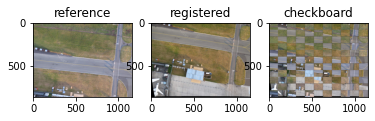

In [81]:
X, Y, Z = register(DX1, DY1)
#generate regsitered image using TPS
registered = tps_warp(Y, Z, IY, IX.shape)
cb = checkboard(IX, registered, 11)

plt.subplot(131)
plt.title('reference')
plt.imshow(cv2.cvtColor(IX, cv2.COLOR_BGR2RGB))
plt.subplot(132)
plt.title('registered')
plt.imshow(cv2.cvtColor(registered, cv2.COLOR_BGR2RGB))
plt.subplot(133)
plt.title('checkboard')
plt.imshow(cv2.cvtColor(cb, cv2.COLOR_BGR2RGB))
plt.show()

In [79]:
X, Y, Z = register(DX1, DY1)

finish: itr 4, Q -910, tau 0


In [80]:
tps_warp(Y, Z, IY, IX.shape)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)